In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline # essential libraries for data analysis and visualizations

UsageError: unrecognized arguments: # essential libraries for data analysis and visualizations


In [43]:
iris = sns.load_dataset('iris') # getting the dataset from seaborn built-in class 'load_dataset'

In [44]:
iris.head() # checking the head of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [46]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


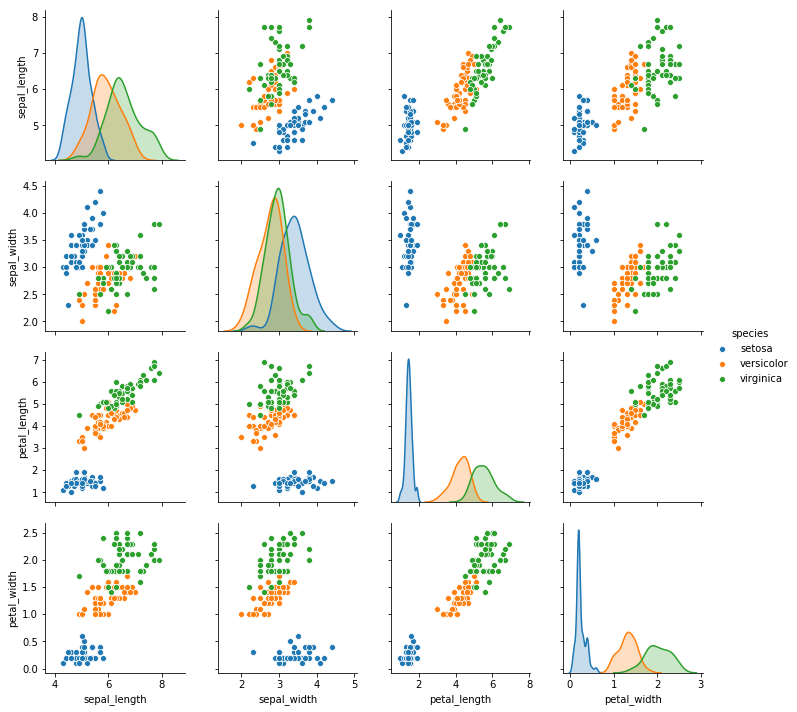

In [47]:
sns.pairplot(data = iris, hue = 'species') # creats the pairplot that shows the visualzation for every single column of the DataFrame with respect to the other.
# Seperating on col 'species'

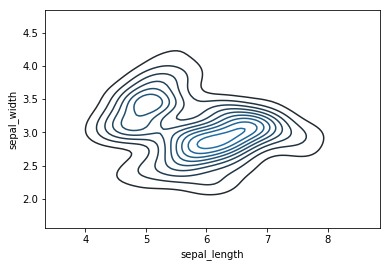

In [48]:
sns.kdeplot(iris['sepal_length'], iris['sepal_width'])

In [49]:
# now lets go ahead and train the model
from sklearn.model_selection import train_test_split

In [50]:
X = iris.drop('species', axis = 1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
# training our model on given parameters 'X' and 'y'
# X being training data
# while being testing data

In [51]:
X_train.shape # checking the shapes of my DataFrame matrix

(105, 4)

In [52]:
X_test.shape

(45, 4)

In [53]:
# now lets go ahead and create our model that predicts different classes for different species of iris flower
from sklearn.svm import SVC

In [54]:
model = SVC() # instantiating our model

In [55]:
model.fit(X_train, y_train) # training our model using training data

/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
predictions = model.predict(X_test) # making predictions off of our model

In [57]:
predictions # looks like it's doing a fine job :) predicting all three classes

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor'], dtype=object)

In [58]:
# lets use a trick here,
# say we want not the names of classes, but we want to associate a category 'A', 'B', 'C' with the names
# in order to do that

#dic = {'setosa':'A', 'virginica':'B', 'versicolor':'C'}
#predictions = pd.Series(data = predictions)
#predictions = predictions.map(dic)
# run the upper code it works fine

In [59]:
#predictions.head() # prefect

In [60]:
# lets see the accuracy of our model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [61]:
# Its doing perfect! predicting values 100% accurate
# since our model is predicting 100% correct values, we don't need to use any further tricks to train it better
# however for learning purpose I will show you how can we use a 'kernal' trick in support vector machines to come up with
# even better results

from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {'C':[1,10,100,1000], 'gamma':[.1,0.01,0.001,0.001]} # Setting our parameters dictionary

In [63]:
param_grid

{'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.001]}

In [75]:
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, verbose = 5) # feeding GridSearchCV the estimator, param_grid, and verbose

In [76]:
grid.fit(X_train, y_train) # fitting our new model

/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ........................ C=1, gamma=0.1, score=1.0, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.9142857142857143, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8611111111111112, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8285714285714286, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8529411764705882, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
/home/umairshah/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [77]:
grid.best_estimator_ # calling different attributes off of our grid instance, to see some cool features it has

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
grid.best_index_

0

In [79]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [80]:
grid_predictions = grid.predict(X_test) # predicting with our new model

In [70]:
grid_predictions

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor'], dtype=object)

In [81]:
print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions)) # accuracy check!

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [72]:
# surprisengly GridSearchCV chooses the best parameters for us to make predictions, but here its less accurate
# then the normal SVC model. Which shows there is some point that is too noisy, which leads an overfit using
# GridSearchCV. That's why it's showing less accurate results in this case only!

In [73]:
# umairgillani93@gmail.com
# Github: UG_PYTHON